In [11]:
pip install sounddevice numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd 
import librosa
import glob 
import sounddevice as sd
import wave
import tensorflow as tf  
import matplotlib.pyplot as plt

In [2]:
## take audio input

def record_audio(filename, duration, samplerate=44100):
    print("Recording...")
    audio_data = sd.rec(int(duration * samplerate), samplerate=samplerate, channels=2, dtype=np.int16)
    sd.wait()
    print("Recording finished.")

    with wave.open(filename, 'wb') as wf:
        wf.setnchannels(2)
        wf.setsampwidth(2)
        wf.setframerate(samplerate)
        wf.writeframes(audio_data.tobytes())

In [3]:
import librosa
import numpy as np

def data_extraction(file_path):
    data = []
    y, sr = librosa.load(file_path, sr=None)  # Load with original sampling rate
    print("Audio length:", len(y))

    intervals = librosa.effects.split(y, top_db=30)  # Detect non-silent regions
    mean_sample_size = 14346

    series_y = pd.Series(y)
    series_y.plot(figsize=(10, 5))
    plt.show()

    for interval in intervals:
        start, end = interval
        interval_size = end - start
        num_notes = interval_size // mean_sample_size
        print("Notes in interval:", num_notes)

        remain = interval_size - num_notes * mean_sample_size
        shift = remain // 2 if remain >= 0.5 * mean_sample_size else 0

        for i in range(num_notes):
            mid = start + (i * mean_sample_size) + shift
            y_sample = y[mid : mid + mean_sample_size]

            if len(y_sample) < mean_sample_size:
                continue  # Skip if the sample is too short

            # Compute Mel spectrogram
            mel_spec = librosa.feature.melspectrogram(y=y_sample, sr=sr, n_mels=128)
            sound_db_sample = librosa.power_to_db(mel_spec, ref=np.max)

            # Normalize to range [0,1]
            sound_db_sample = np.clip(sound_db_sample, -80, 0)
            sound_db_sample = (sound_db_sample + 80) / 80

            min_val, max_val = np.min(sound_db_sample), np.max(sound_db_sample)
            if min_val != max_val:
                sound_db_sample = (sound_db_sample - min_val) / (max_val - min_val)
            else:
                sound_db_sample = np.zeros_like(sound_db_sample)

            data.append(sound_db_sample)

    return data

In [ ]:
record_audio("output.wav", duration=5)

Audio length: 220500


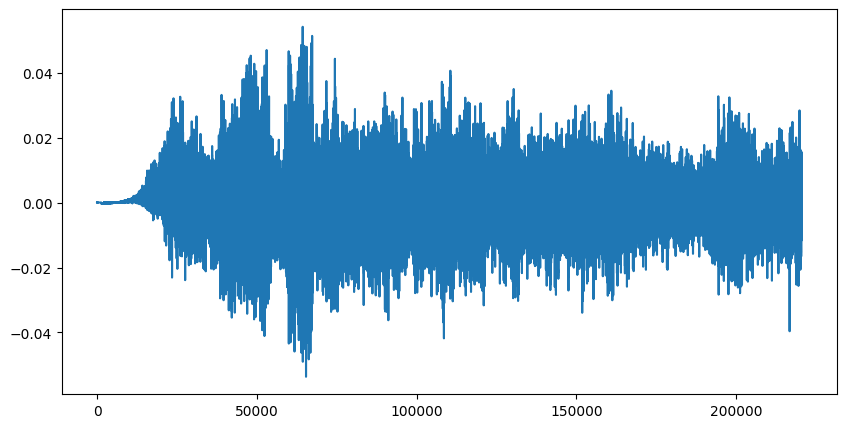

Notes in interval: 14


In [4]:
data = data_extraction("output.wav")

In [2]:
from tensorflow.keras.initializers import Orthogonal

model_path = r"C:\Resume_projects\flute_teaching_kit\model\crnn_model_final.keras"
loaded_model = tf.keras.models.load_model(model_path, custom_objects={"Orthogonal": Orthogonal})

ImportError: Traceback (most recent call last):
  File "c:\Users\Rounak\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.initializers import Orthogonal

ImportError: Traceback (most recent call last):
  File "c:\Users\Rounak\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.